# EDA y elección de las variables para el modelo de recomendación

Realizamos el Análisis Exploratorio de datos de los tres conjuntos ya limpios para seleccionar las variables clave para el modelo de recomendación. Esto se debe al gran volumen de información y a limitaciones de recursos en procesamiento y almacenamiento, especialmente al implementar el proyecto.

## Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

## EDA del dataset  `user_reviews`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_reviews` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [2]:
df_reviews = pd.read_parquet('../Datasets/user_reviews.parquet')
df_reviews.head(3)

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,1
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,1
3,doctr,http://steamcommunity.com/id/doctr,2013-10-14,250320,2 of 2 people (100%) found this review helpful,True,2


Se revisan los tipos de datos y cantidad de nulos si hay.

In [3]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
df_reviews.isnull().sum().sort_values(ascending=False)

La cantidad de registros que hay son: 47599


user_id               0
user_url              0
posted                0
item_id               0
helpful               0
recommend             0
sentiment_analysis    0
dtype: int64

Se cuentan con 47,599 opiniones de usuarios sobre juegos. Aunque no hay valores nulos, durante el proceso de ETL, se identificaron datos faltantes en la columna 'reviews_date', los cuales se eliminaron

### Columnas 'sentiment_analysis' y 'recommend'

Se exploran las columnas 'sentiment_analysis' y 'recommend'.

In [4]:
def resumen_porcentaje(df, columna):
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_results = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_results

In [5]:
resumen_porcentaje(df_reviews, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,42753,89.82
False,4846,10.18


In [6]:
resumen_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
1,28921,60.76
2,14622,30.72
0,4056,8.52


Aproximadamente el 61% de las reviews son neutrales, alrededor del 31% expresan sentimientos positivos y menos del 9% son negativos. Sin embargo, el 90% de las reviews recomiendan los juegos analizados.
En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [7]:
# Se agrupa por 'sentiment_analysis' y 'recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False          1230    2.584088
                   True           2826    5.937100
1                  False          3188    6.697620
                   True          25733   54.062060
2                  False           428    0.899179
                   True          14194   29.819954

Cerca del 54% de revisiones neutrales recomiendan el juego, indicando opiniones simples pero favorables. Aproximadamente el 6% de opiniones negativas aún recomiendan el juego, lo que genera una contradicción.

En el siguiente gráfico se puede ver la distribución de la cantidad de reviews por día.

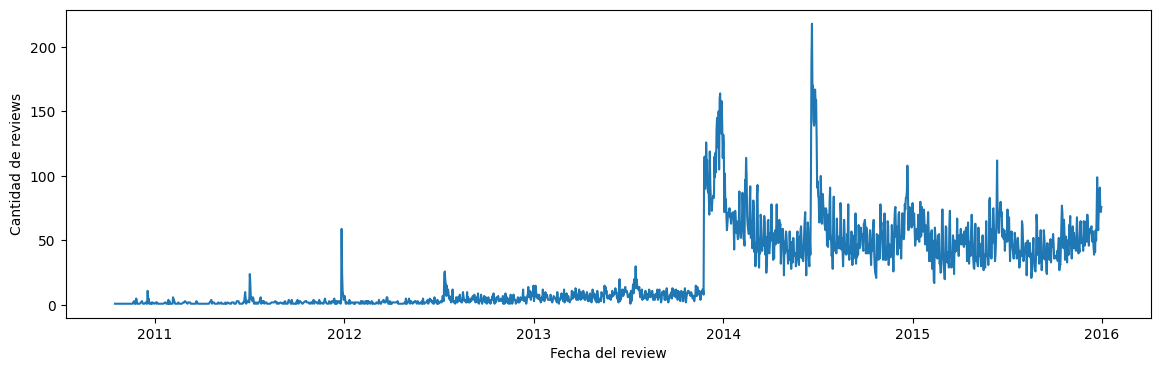

In [8]:
# Calcula la cantidad de review por fecha
df_counts = df_reviews.groupby("posted").count()

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="posted", y="recommend")
plt.ylabel('Cantidad de reviews')
plt.xlabel('Fecha del review')
plt.show()

In [9]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='recommend', ascending=False)['recommend'][:5]

Días de cantidad pico de reviews


posted
2014-06-21    218
2014-06-20    187
2014-06-23    170
2014-06-27    167
2013-12-26    164
Name: recommend, dtype: int64

Hasta 2014, las revisiones diarias eran escasas, con picos ocasionales. A partir de entonces, hubo un notable aumento en los comentarios, alcanzando su punto máximo el 21-06-2014 con 218 comentarios en un solo día.

## EDA del dataset  `steam_games`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `steam_games` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

In [10]:
df_games = pd.read_parquet('../Datasets/steam_games.parquet')
df_games.head(3)

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,item_id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,2018.0
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,2018.0


Se revisan los tipos de datos y cantidad de nulos si hay.

In [11]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
df_games.isnull().sum().sort_values(ascending=False)

La cantidad de registros que hay son: 70701


publisher       12411
specs             557
developer         350
tags               46
app_name            2
title               2
genres              0
url                 0
reviews_url         0
price               0
early_access        0
item_id             0
release_year        0
dtype: int64

El conjunto de datos contiene 70,701 registros sobre juegos, incluyendo detalles como precio, año de lanzamiento, nombre del juego, desarrollador, publicitador y género. Se repite información debido a que un juego puede estar asociado a múltiples géneros.

### Columnas 'item_id', 'app_name' y 'title'

Las columnas identifican el juego y su título, sin información relevante actualmente. El 'item_id' permite calcular la cantidad de juegos.

In [12]:
total_juegos = len(df_games['item_id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28547


Hay un total de 28,547 juegos en la plataforma.

### Columna 'genres'

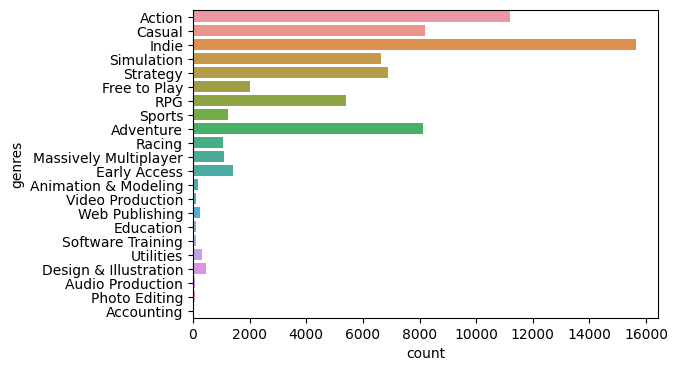

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

In [14]:
resumen_porcentaje(df_games, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15634,22.11
Action,11177,15.81
Casual,8211,11.61
Adventure,8111,11.47
Strategy,6893,9.75
Simulation,6648,9.40
RPG,5412,7.65
Free to Play,2013,2.85
Early Access,1419,2.01


Los juegos estan categorizados mayormente en las categorías *Indi*, *Action*, *Casual* y *Adventure*. Cabe recordar que un juego puede tener mas de un género asociado.

### Columna 'release_year'

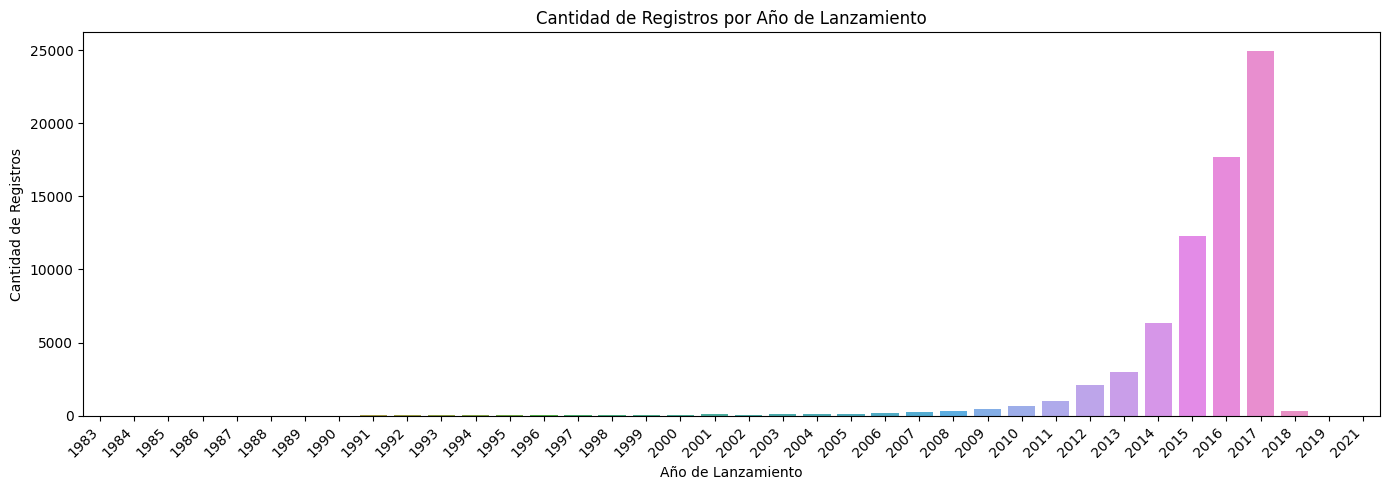

In [15]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['release_year'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index.astype(int), y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Columnas 'publisher' y 'developer'

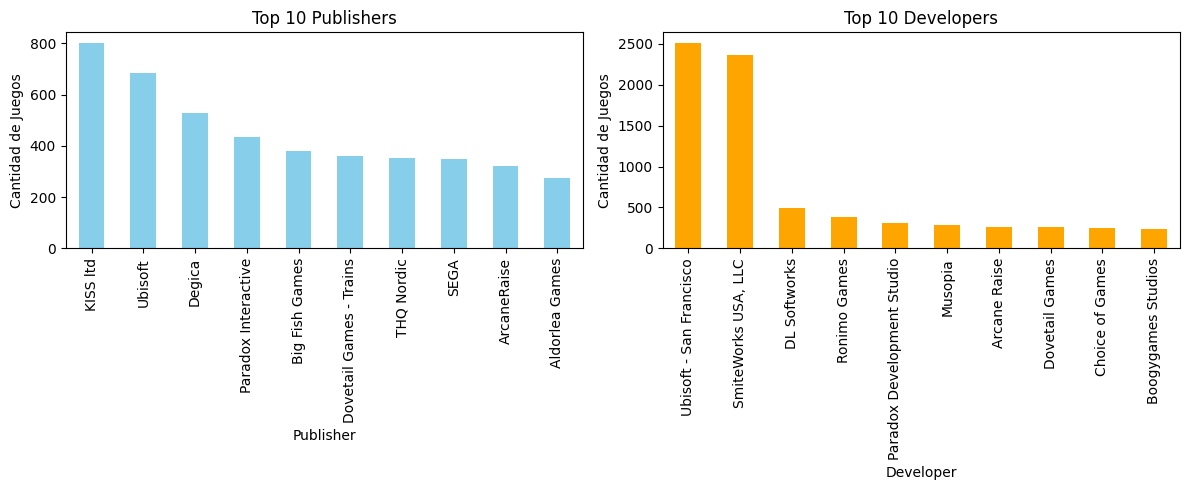

In [16]:
# Contar la cantidad de juegos por publisher
conteo_publisher = df_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

La mayoría de los publicistas de juegos no tienen datos disponibles. Entre los desarrolladores, Ubisoft y SmiteWorks son los que más juegos han creado para la plataforma.

## EDA del dataset  `users_items`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `users_items`  que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

In [17]:
df_items = pd.read_parquet('../Datasets/user_items.parquet')
df_items.head(3)

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se revisan los tipos de datos y cantidad de nulos si hay.

In [18]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
df_items.isnull().sum().sort_values(ascending=False)

La cantidad de registros que hay son: 5094105


item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
steam_id            0
items_count         0
user_id             0
user_url            0
dtype: int64

El conjunto de datos tiene 5,094,105 registros que incluyen información sobre usuarios, juegos, tiempo de juego (en minutos), cantidad de items consumidos, identificadores de juegos y usuarios, además de la URL del perfil del usuario.

### Columna 'playtime_forever'

Estas columnas hacen referencia al tiempo en minutos acumulados que un usuario ha jugado.

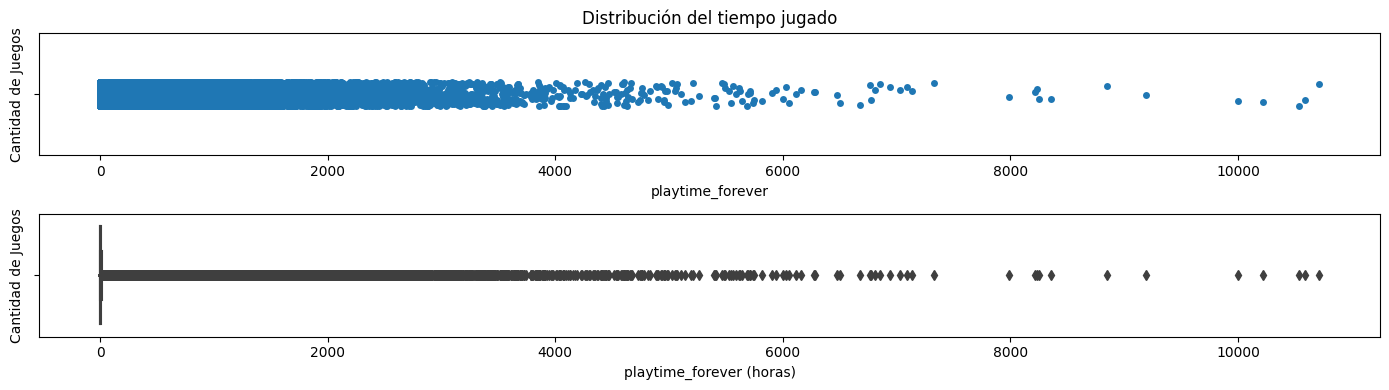

In [19]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución del tiempo jugado')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [20]:
def bigote_max(columna):
    # Cuartiles
    q1 = columna.describe()[4]
    q3 = columna.describe()[6]

    # Valor del vigote
    bigote_max = round(q3 + 1.5*(q3 - q1), 2)
    print(f'El bigote superior de la variable {columna.name} se ubica en:', bigote_max)

    # Cantidad de atípicos
    print(f'Hay {(columna > bigote_max).sum()} valores atípicos en la variable {columna.name}')

In [21]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El tiempo medio (mediana) jugando es de: {round(estadisticas[5],2)}')
print(f'El tiempo promedio (mean) jugando es de: {round(estadisticas[1],2)}')
print(f'El 75% de los jugadores pasan menos de: {round(estadisticas[6],2)} jugando')
bigote_max(df_items['playtime_hours'])

El tiempo medio (mediana) jugando es de: 0.57
El tiempo promedio (mean) jugando es de: 16.51
El 75% de los jugadores pasan menos de: 5.92 jugando
El bigote superior de la variable playtime_hours se ubica en: 14.79
Hay 763606 valores atípicos en la variable playtime_hours


La mayoría de los usuarios juegan en promedio 0.57 horas, con el 75% jugando menos de 6 horas. Sin embargo, se detectan valores atípicos significativos, con algunos usuarios jugando más de 14.79 horas, posiblemente debido al uso de bots que distorsionan los tiempos reales de juego al usar el mismo perfil para jugar simultáneamente.

## Elección de las variables a usar en el modelo de recomendación

El objetivo es generar una lista de 5 juegos recomendados a partir del ID de un juego o el ID de un usuario, utilizando un puntaje definido. Esto se logra analizando los dataframes df_reviews y df_items previamente estudiados en el modelo de recomendación.

In [22]:
df_items = pd.read_parquet('../Datasets/user_items.parquet')
df_reviews = pd.read_parquet('../Datasets/user_reviews.parquet')

In [23]:
df_reviews.head(2)

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,1
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,1


In [24]:
df_items.head(2)

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se crea un sistema de puntaje (rating) para los juegos basado en el análisis de sentimiento de las reviews y las recomendaciones de los usuarios. El análisis de sentimiento se califica en 0 (negativo), 1 (neutral) y 2 (positivo), mientras que las recomendaciones son True (recomendado) o False (no recomendado). El puntaje final varía de 1 a 5, donde 1 indica un juego no recomendado con reviews negativas, y 5 indica un juego altamente recomendado con reviews positivas. Esta escala se establece considerando la combinación de ambas variables.

* **1** si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
* **2** si el análisis de sentimiento es neutral y no es recomendado (False)
* **3** si el análisis de sentimiento es neutral pero es recomendado (True)
* **4** si el análisis de sentimiento es positivo y no es recomendado (False)
* **5** si el análisis de sentimiento es positivo y es recomendado (True)

Con esto, se arma la siguiente función:

In [25]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if row["sentiment_analysis"] == 0 and not row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["recommend"]:
        return 5
    else:
        return None

Se aplica esta función en una nueva columna sobre el dataframe `df_reviews`

In [26]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis,rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,1,3
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,1,3


Se crea un nuevo dataframe dejando solo las columnas 'user_id', 'item_id' y 'rating' y se reserva.

In [27]:
df1 = df_reviews[['user_id', 'item_id', 'rating']]
df1.head(2)

,user_id,item_id,rating
0,76561197970982479,1250,3
1,js41637,251610,3


Se crea otro dataframe que contenga unicamente los 'item_id' y los nombres de los juego.

In [28]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10978 juegos


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


Luego se agregan los nombres de los juegos al primer dataframe.

In [29]:
df = df1.merge(df2, left_on="item_id", right_on="item_id", how='left')
df

,user_id,item_id,rating,item_name
0,76561197970982479,1250,3,Killing Floor
1,js41637,251610,3,Barbie™ Dreamhouse Party™
2,doctr,250320,5,The Wolf Among Us
3,maplemage,211420,3,Dark Souls: Prepare to Die Edition
4,Wackky,249130,1,LEGO® MARVEL Super Heroes
...,...,...,...,...
47594,kushikushigani,332310,3,LEGO® Worlds
47595,How51,440,3,NaN
47596,76561198111410893,304930,3,Unturned
47597,zaza147,265630,5,Fistful of Frags


Se analizan juegos con comentarios ausentes en 'df_reviews'. Se revisan tipos de datos, nulos y se examinan las filas afectadas.

In [30]:
df.isnull().sum().sort_values(ascending=False)

item_name    5613
user_id         0
item_id         0
rating          0
dtype: int64

In [31]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['item_id'].unique())} juegos con reviews pero que no estan en `df_reviews`")
sin_juegos

Hay un total de 251 juegos con reviews pero que no estan en `df_reviews`


,user_id,item_id,rating,item_name
14,devvonst,440,5,NaN
21,76561198076909484,570,1,NaN
27,boydeer,440,3,NaN
32,jarrodtrim,440,5,NaN
33,76561198067936203,440,3,NaN
...,...,...,...,...
47555,JacTehSharp,440,3,NaN
47557,ViniReaper,440,5,NaN
47579,BlinkV1,440,3,NaN
47586,76561198095035915,440,1,NaN


Se decide borrarlos del conjunto de datos.

In [32]:
# Se borran los nulos
df = df.dropna(subset=['item_name'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')
# Se verifican los tipo de dato y nulos
df.isnull().sum().sort_values(ascending=False)

Quedan 41986 registros


user_id      0
item_id      0
rating       0
item_name    0
dtype: int64

Se convierte en entero la columna 'item_id' y se crea un último dataframe con las columnas necesarias para los modelos de recomendación.

In [35]:
df['item_id'] = pd.to_numeric(df['item_id'], errors='coerce').fillna(0).astype(int)
#df = df[['user_id', 'item_name', 'rating']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41986 entries, 0 to 47598
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    41986 non-null  object
 1   item_id    41986 non-null  int32 
 2   rating     41986 non-null  int64 
 3   item_name  41986 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 1.4+ MB


En el siguiente gráfico se pueden ver la cantidad de reviews distribuidos por el puntaje adoptado.

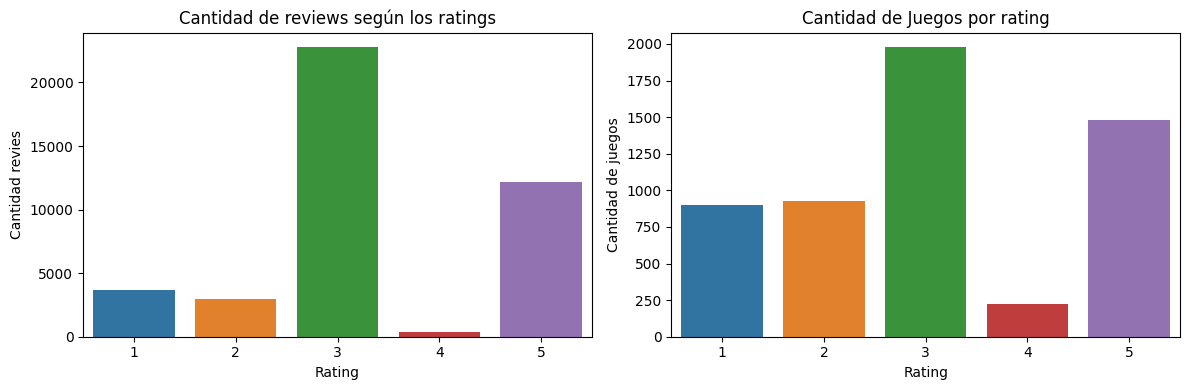

In [36]:
# Agrupa las calificaciones por rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0])
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Cantidad revies')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1])
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [37]:
# Cantidades de review por rating
resumen_porcentaje(df, 'rating')

,Cantidad,Porcentaje
rating,,
3,22766,54.22
5,12138,28.91
1,3679,8.76
2,3006,7.16
4,397,0.95


In [38]:
# Cantidades de juegos por rating
unique_games_per_rating

,rating,item_name
0,1,898
1,2,926
2,3,1977
3,4,223
4,5,1480


La gráfica muestra que la mayoría de las reseñas tienen un 'rating' de 3, indicando sentimientos neutrales y recomendaciones del juego, representando el 54% de los comentarios (22766 reseñas). Le siguen 12138 reseñas positivas recomendando los juegos, mientras que hay menos de 4000 comentarios con sentimiento negativo.

Finalmente, se guarda el dataframe a utilizar en el modelo de recomnedación.

In [39]:
df.to_parquet('../Datasets/recomendacion.parquet')